<a href="https://colab.research.google.com/github/masatoran/DaconDefaultCompetiton/blob/master/DaconVer4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y keras tensorflow tensorflow-estimator

Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [ ]:
!pip install --upgrade tensorflow

  Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.4 MB)
Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)


In [1]:
import tensorflow as tf
print(tf.__version__)  # TensorFlow„ÅÆ„Éê„Éº„Ç∏„Éß„É≥„ÇíÁ¢∫Ë™ç
print(tf.keras.__version__)  # Keras„ÅÆ„Éê„Éº„Ç∏„Éß„É≥„ÇíÁ¢∫Ë™ç

2.18.0
3.8.0


In [2]:
from tensorflow import keras
print(keras.__version__)

3.8.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
import pandas as pd
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold

# Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
from imblearn.over_sampling import SMOTE

# Î™®Îç∏ ÌèâÍ∞Ä
from sklearn.metrics import roc_auc_score

# Îî•Îü¨Îãù Î™®Îç∏ (TensorFlow)
#import tensorflow as tf
#import tensorflow.keras as keras

import matplotlib.pyplot as plt

In [4]:
# TensorFlow GPU Í∞ÄÏÜç ÌôïÏù∏
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("‚úÖ GPU Í∞ÄÏÜç ÌôúÏÑ±ÌôîÎê®!")
else:
    print("‚ö†Ô∏è GPUÎ•º Í∞êÏßÄÌï† Ïàò ÏóÜÏäµÎãàÎã§. CPUÏóêÏÑú Ïã§ÌñâÎê©ÎãàÎã§.")

‚úÖ GPU Í∞ÄÏÜç ÌôúÏÑ±ÌôîÎê®!


1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è UID Ï≤òÎ¶¨

In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/DaconCompe/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DaconCompe/test.csv')

In [6]:
# "UID" Ïª¨Îüº Ïú†ÏßÄ (Ï†úÏ∂ú ÌååÏùºÏö©)
test_uid = test_df[["UID"]]

# "UID" Ïª¨Îüº ÏÇ≠Ï†ú
train_df.drop(columns=["UID"], inplace=True)
test_df.drop(columns=["UID"], inplace=True)

# X, y Î∂ÑÎ¶¨
X = train_df.drop(columns=["Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä"])
y = train_df["Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ Ïó¨Î∂Ä"]

2. Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨ (ÎùºÎ≤® Ïù∏ÏΩîÎî© & Ïõê-Ìï´ Ïù∏ÏΩîÎî©)

In [7]:
categorical_cols = ["Ï£ºÍ±∞ ÌòïÌÉú", "ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"]

# ÎùºÎ≤® Ïù∏ÏΩîÎî© (ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò)
label_enc = LabelEncoder()
X["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"] = label_enc.fit_transform(X["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"])
test_df["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"] = label_enc.transform(test_df["ÌòÑÏû¨ ÏßÅÏû• Í∑ºÏÜç Ïó∞Ïàò"])

# Ïõê-Ìï´ Ïù∏ÏΩîÎî© Ï†ÅÏö©
X = pd.get_dummies(X, columns=["Ï£ºÍ±∞ ÌòïÌÉú", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Ï£ºÍ±∞ ÌòïÌÉú", "ÎåÄÏ∂ú Î™©Ï†Å", "ÎåÄÏ∂ú ÏÉÅÌôò Í∏∞Í∞Ñ"], drop_first=True)

3. ÏàòÏπòÌòï Î≥ÄÏàò Î≥ÄÌôò (Î°úÍ∑∏ Î≥ÄÌôò Ï†ÅÏö©)

In [8]:
# Î°úÍ∑∏ Î≥ÄÌôò
log_columns = ["ÌòÑÏû¨ ÎØ∏ÏÉÅÌôò Ïã†Ïö©Ïï°", "Ïõî ÏÉÅÌôò Î∂ÄÏ±ÑÏï°", "ÌòÑÏû¨ ÎåÄÏ∂ú ÏûîÏï°"]
for col in log_columns:
    X[col] = np.log1p(X[col])
    test_df[col] = np.log1p(test_df[col])

# "ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"Í∞Ä 0Ïù¥Î©¥ "Ïó∞Ï≤¥ ÏóÜÏùå" Ïª¨Îüº Ï∂îÍ∞Ä
X["Ïó∞Ï≤¥ ÏóÜÏùå"] = (X["ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"] == 0).astype(int)
test_df["Ïó∞Ï≤¥ ÏóÜÏùå"] = (test_df["ÎßàÏßÄÎßâ Ïó∞Ï≤¥ Ïù¥ÌõÑ Í≤ΩÍ≥º Í∞úÏõî Ïàò"] == 0).astype(int)

4. Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨

In [9]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)
test_imputed = imputer.transform(test_df)

5. Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ (StandardScaler Ï†ÅÏö©)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
test_scaled = scaler.transform(test_imputed)

6. Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (SMOTE Ï†ÅÏö©)

In [11]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

 7. Îî•Îü¨Îãù Î™®Îç∏ Ï†ïÏùò / ÌïôÏäµ / ÌèâÍ∞Ä

üîÑ Fold 1 ÏãúÏûë
Epoch 1/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 13ms/step - accuracy: 0.4757 - loss: 0.7281 - val_accuracy: 0.4799 - val_loss: 0.7000
Epoch 2/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 4ms/step - accuracy: 0.4881 - loss: 0.7132 - val_accuracy: 0.5057 - val_loss: 0.6926
Epoch 3/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.5075 - loss: 0.7039 - val_accuracy: 0.5231 - val_loss: 0.6872
Epoch 4/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 4ms/step - accuracy: 0.5115 - loss: 0.6997 - val_accuracy: 0.5402 - val_loss: 0.6829
Epoch 5/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.5320 - loss: 0.6932 - val_accuracy: 0.5520 - val_loss: 0.6788
Epoch 6/100
330/330 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.5388 - loss: 0.6904 - val_ac

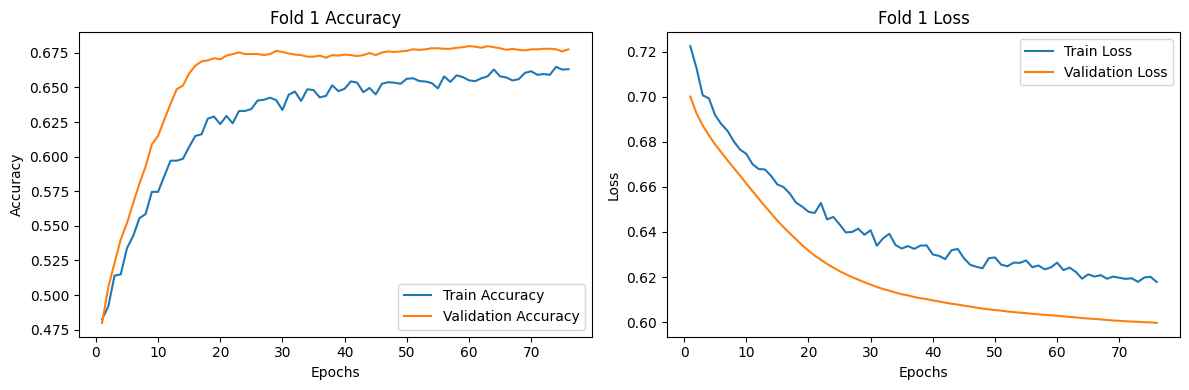

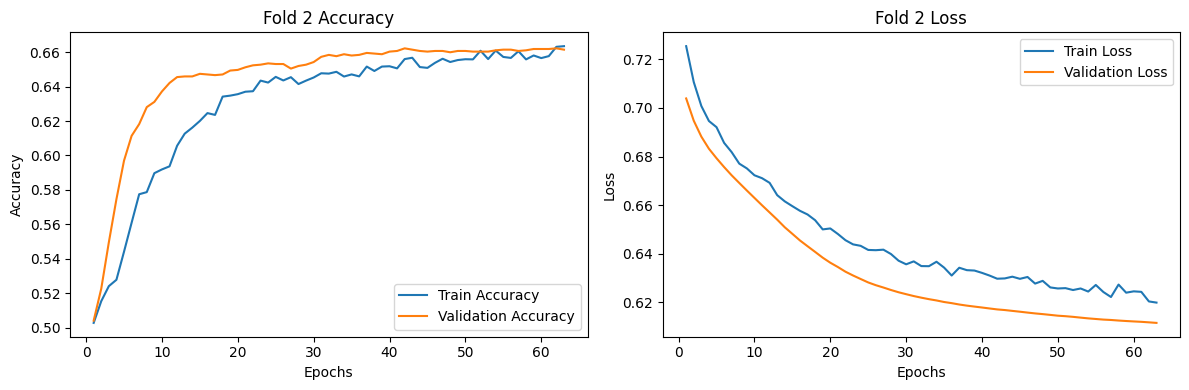

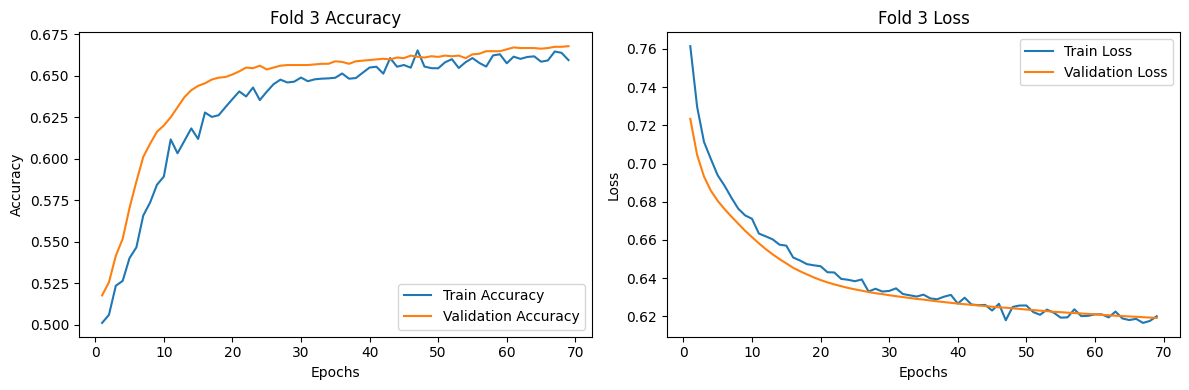

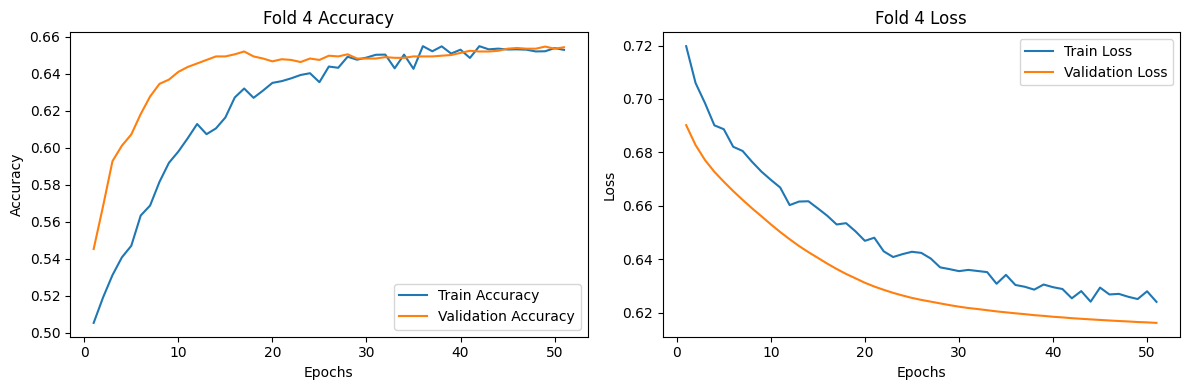

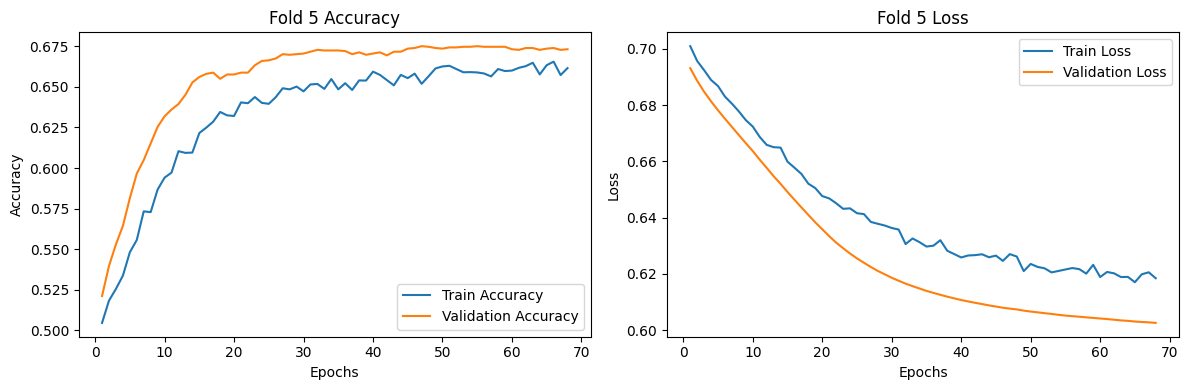

In [12]:
# FoldÎ≥Ñ AccuracyÏôÄ Loss Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
all_history = []  # Ïù¥ Ï§ÑÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ all_historyÎ•º Î™ÖÌôïÌûà Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
roc_auc_scores = []

for train_index, valid_index in kf.split(X_resampled):
    print(f"üîÑ Fold {fold} ÏãúÏûë")

    # ÌïôÏäµ/Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
    X_train_fold, X_valid_fold = X_resampled[train_index], X_resampled[valid_index]
    y_train_fold, y_valid_fold = y_resampled[train_index], y_resampled[valid_index]

    # Î™®Îç∏ Ï†ïÏùò
    model = keras.Sequential([
        keras.layers.Dense(128, activation="relu", input_shape=(X_train_fold.shape[1],)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    # Î™®Îç∏ Ïª¥ÌååÏùº
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # Ï°∞Í∏∞ Ï¢ÖÎ£å ÏΩúÎ∞± ÏÑ§Ï†ï
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        min_delta=0.001,
        restore_best_weights=True
    )

    # Î™®Îç∏ ÌïôÏäµ
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_valid_fold, y_valid_fold),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # FoldÏùò ÌïôÏäµ Í≤∞Í≥º Ï†ÄÏû•
    all_history.append(history.history)  # FoldÎ≥Ñ ÌïôÏäµ Í≤∞Í≥º Ï†ÄÏû•

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
    y_valid_pred = model.predict(X_valid_fold).flatten()
    roc_auc = roc_auc_score(y_valid_fold, y_valid_pred)
    print(f"Fold {fold} Validation ROC-AUC: {roc_auc:.4f}")
    roc_auc_scores.append(roc_auc)
    fold += 1

# ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ ÍµêÏ∞®Í≤ÄÏ¶ù ÌèâÍ∑† ROC-AUC: {np.mean(roc_auc_scores):.4f}")

# ÏãúÍ∞ÅÌôî: FoldÎ≥Ñ AccuracyÏôÄ Loss
for i, history in enumerate(all_history):
    epochs = range(1, len(history['loss']) + 1)

    plt.figure(figsize=(12, 4))

    # Accuracy ÏãúÍ∞ÅÌôî
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['accuracy'], label='Train Accuracy')
    plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {i + 1} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss ÏãúÍ∞ÅÌôî
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {i + 1} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [14]:
y_test_pred = model.predict(test_scaled).flatten()  # ÌôïÎ•† Í∞í Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

# Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±
submission = pd.DataFrame({
    "UID": test_uid["UID"],
    "Ï±ÑÎ¨¥ Î∂àÏù¥Ìñâ ÌôïÎ•†": y_test_pred  # ÌôïÎ•†Í∞íÏùÑ Í∑∏ÎåÄÎ°ú Ï†ÄÏû•
})

# CSV Ï†ÄÏû•
submission.to_csv("/content/drive/MyDrive/DaconCompe/submission/submission_2.csv", index=False)

print("‚úÖ Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å! Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

65/65 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
‚úÖ Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ± ÏôÑÎ£å! Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
